# Лабораторная работа №1
Разведочный анализ данных. Исследование и визуализация данных.

Выполнил: Пакало А. С., РТ5-61Б

# Текстовое описание набора данных
В качестве набора данных был выбран игрушечный датасет "Ирисы Фишера" из библиотеки scikit-learn.

В данном датасете присутствуют следующие столбцы:
- sepal length — длина чашелистика в см;
- sepal width — ширина чашелистика в см;
- petal length — длина лепестка в см;
- petal width — ширина лепестка в см;
- target — целевой признак. Представляет собой виды ирисов: Iris setosa(0), Iris versicolor (1), Iris virginica (2).

# Импортирование необходимых библиотек, подготовка окружения

In [257]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
%matplotlib inline 
sns.set(style="ticks")

## Загрузка набора данных

In [258]:
df = load_iris(as_frame=True)
data = df.frame

# Основные характеристики датасета

In [180]:
data.tail()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2
149,5.9,3.0,5.1,1.8,2


In [181]:
data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


## Размер датасета (кол-во строк, кол-во колонок)

In [182]:
num_of_rows, num_of_columns = data.shape
print(f'Размер датасета: {num_of_rows} строк, {num_of_columns} колонок')

Размер датасета: 150 строк, 5 колонок


## Определение типов

In [183]:
data.dtypes

sepal length (cm)    float64
sepal width (cm)     float64
petal length (cm)    float64
petal width (cm)     float64
target                 int64
dtype: object

# Уникальные значения для целевого признака
Как видно, целевоый признак является категориальным:

In [184]:
classes = list(df.target_names)
for i, className in enumerate(classes):
    print(f'{className} - {i}')

setosa - 0
versicolor - 1
virginica - 2


# Находим пропуски

In [185]:
for col in data.columns:
    temp_null_count = data[data[col].isnull()].shape[0]
    print(f'{col} - {temp_null_count}')

sepal length (cm) - 0
sepal width (cm) - 0
petal length (cm) - 0
petal width (cm) - 0
target - 0


# Основные статистические характеристики набора данных

In [186]:
data.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


№

In [187]:
# Decoding target names for legend readibility.
target_col_name = 'target'
formatted_data = data.replace({target_col_name: dict(enumerate(classes))})

# Визуальное исследование датасета

## Диаграмма рассеяния

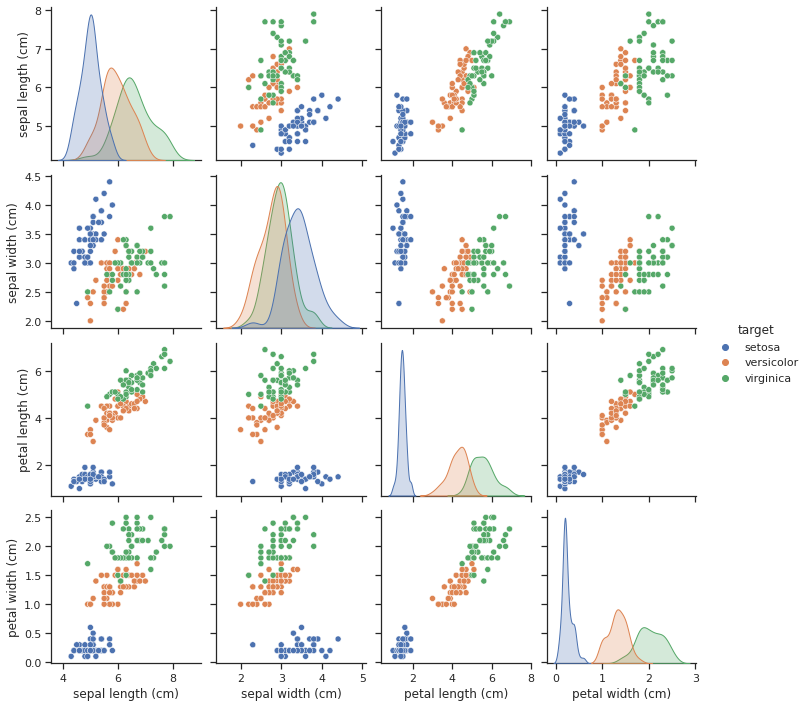

In [188]:
sns.pairplot(formatted_data, hue=target_col_name)

По диаграммам рассеяния видно, что по каждой паре признаков ирисы setosa легко отличимы от остальных видов.

В свою очередь, по диаграммам распределения можно сделать вывод, что отличие по длине и ширине лепестков наиболее значительное.

<AxesSubplot:xlabel='sepal length (cm)', ylabel='petal width (cm)'>

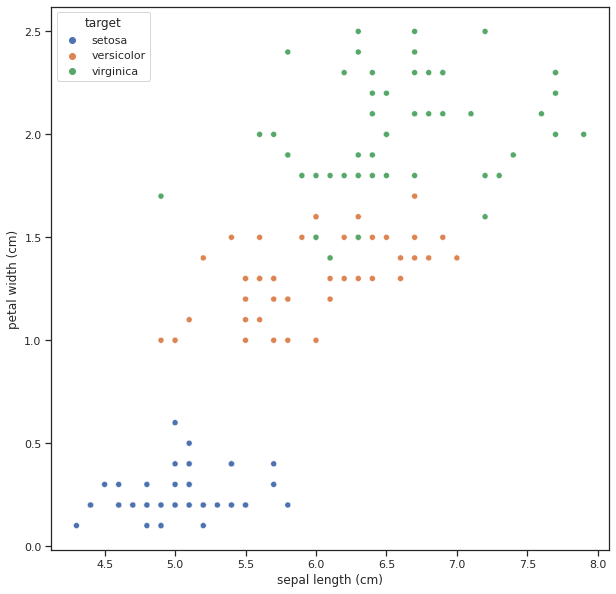

In [189]:
fig, ax = plt.subplots(figsize=(10,10))
sns.scatterplot(ax=ax, x='sepal length (cm)', y='petal width (cm)', data=formatted_data, hue=target_col_name)

# Информация о корреляции признаков

Проверим выводы, сделанные из предыдущих графиков с помощью корреляционной матрицы. Для этого построим её на основе метода Пирсона:

In [261]:
data.corr(method='pearson')

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
sepal length (cm),1.000000,-0.117570,0.871754,0.817941,0.782561
sepal width (cm),-0.117570,1.000000,-0.428440,-0.366126,-0.426658
petal length (cm),0.871754,-0.428440,1.000000,0.962865,0.949035
petal width (cm),0.817941,-0.366126,0.962865,1.000000,0.956547
target,0.782561,-0.426658,0.949035,0.956547,1.000000


<AxesSubplot:>

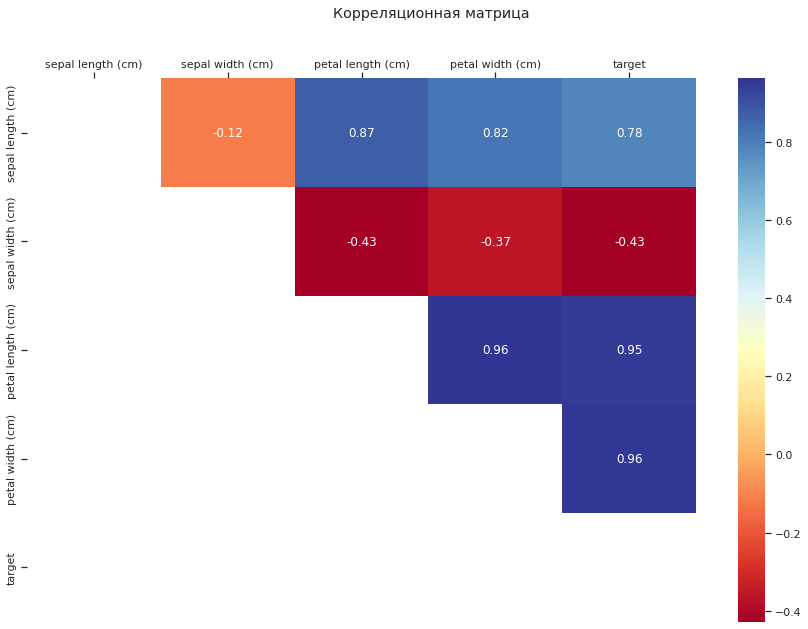

In [259]:
# Создаём треугольную булеан матрицу, на основе которой останутся значения кор. матрицы. Ячейки, в которых соответствующее значение маски равно True, будут скрыты.
mask = np.zeros_like(data.corr(), dtype=bool)
mask[np.tril_indices_from(mask)] = True
# Задаём размер с помощью оси (ax параметр), ось создаём с помощью plt.subplots.
fig, ax = plt.subplots(1, 1, sharex='col', sharey='row', figsize=(15, 10))
ax.xaxis.tick_top()
fig.suptitle('Корреляционная матрица')
sns.heatmap(data.corr(), annot=True, fmt='.2f', ax=ax, mask=mask, cmap='RdYlBu')

На основе корреляционной матрицы можно сделать следующие **выводы**:
- Целевой признак наиболее сильно коррелирует с шириной лепестка (0.96) и его длиной (0.95). Эти признаки обязательно следует оставить в модели.
- Целевой признак сильно отчасти коррелирует с длиной чашелистика (0.78). Этот признак следует оставить в модели.
- Целевой признак сильно отчасти коррелирует с шириной чашелистика (0.43). Этот признак стоит также оставить в модели.
- Ширина и длина лепестка очень сильно коррелируют друг с другом (0.96). От этих признаков в модели можно оставить только один. Возьмём тот, у которого коэффициент корреляции с целевым признаком больше (ширина лепестка), хотя в данном случае это неприниципиально, ведь разница в коэффициентах пренебрежимо мала.

Проверим, что наши выводы справедливы вне зависимости от выбора метода построения корреляционной матрицы. Для этого построим матрицы разными методами:

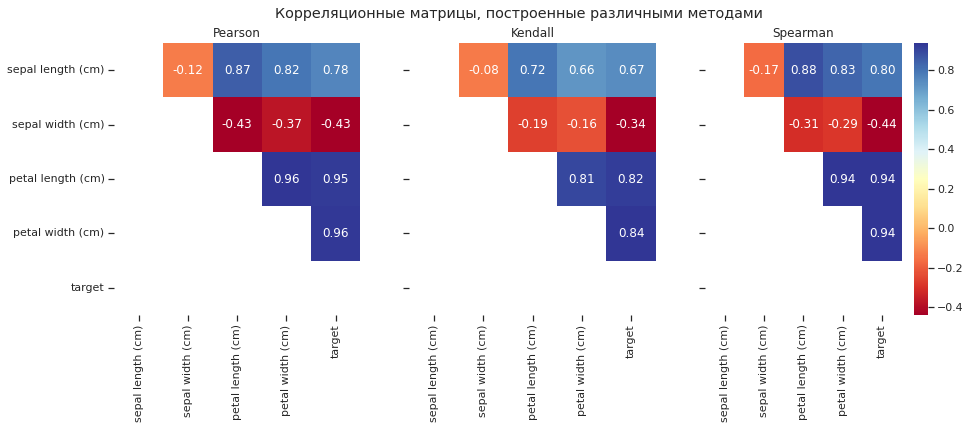

In [327]:
fig, ax = plt.subplots(1, 3, sharey='row', figsize=(15, 5))
fig.suptitle('Корреляционные матрицы, построенные различными методами')

methods = ('pearson', 'kendall', 'spearman')

def is_last(plot_num: int) -> bool:
    return plot_num == len(methods) - 1

for plot_num, method in enumerate(methods):
    cur_ax = ax[plot_num]
    sns.heatmap(data.corr(method=method), ax=cur_ax, mask=mask, annot=True, fmt='.2f', cmap='RdYlBu', cbar=is_last(plot_num))
    cur_ax.title.set_text(method.capitalize())

Как видно, значения изменились, однако все наши выводы верны. Что и требовалось доказать.